
# Linear and Non-linear SVMs in Practice

In this lab, you will learn how to implement **linear SVMs** to solve simple **classification problems**. You will visualize many of the concepts we have discussed in the lectures. In particular, you will visualize soft-margins, the effect of the regularization parameter on the boundaries and the generalization ability of the obtained classifier. 

Please refer to http://scikit-learn.org/stable/ for help regarding installation and usage.
We have prepared a virtual environment with the software you need.  

## Software and Tools

We will implement SVMs using **scikit-learn**, a very popular and complete library for machine learning in Python. We will also use some basic functions of numpy and pandas, part of the basic python ecosystem for data science.

<img width='600px' align='left' src='https://i1.wp.com/blog.leonelatencio.com/wp-content/uploads/2017/07/scikit-learn-logo.png?fit=566%2C202'>


If you use anaconda in the BBS Lab, you can create a virtual environment with all the required software by typing 

`conda create --name BOBBS1 python=3.6 pandas scikit-learn matplotlib jupyter seaborn`

You can activate the environment using:

`conda activate BOBBS1`

To deactivate an environment, type: 

`conda deactivate`

Please check http://scikit-learn.org/stable/ for further help regarding the installation and usage of scikit-learn and its dependencies. 

For a part of the experience you will also need to install two additional tools
(i) python-wget (to download data from web repositories) and (ii) imbalanced-learn, a library to handle imbalanced datasets. You have to install the packages inside the enviroment used to run the labs, typing the following:

`conda install -c conda-forge python-wget`

`conda install -c conda-forge imbalanced-learn`

## Model 

Recall that linear SVMs implement a binary classifier using a hyperplane. This surface is defined by parameters $w$, the vector orthogonal to the separating hyperplane, and $b$, a scalar controlling the distance of the hyperplane to the origin. The soft-margin SVM formulation finds the values of these parameters by solving the following optimization problem:

\begin{align}
\underset{{w},b,\xi}{\mbox{min}} & \ \frac{1}{2} \, \|w\|^2 + C \cdot \sum\nolimits_\ell \xi_\ell\\
\mbox{s.t.} & \ y^{(\ell)}(w^Tx^{(\ell)} + b) \geq 1 - \xi_\ell \, \forall \ell \notag\\
& \ \xi_\ell \geq 0 \, \forall \ell \notag
\end{align}

The classifier (decision function for new cases) takes the form
\begin{align}
f(x) &= \mbox{sign}\left(w^Tx +b \right)
\end{align}
which can output +1 or -1. From here, we can see that before training an SVM our classes should be encoded as +1 and -1 (in most libraries this is automatic).

## Creating Your First SVM

We will start by training and evaluating an basic SVM on the wisconsin breast cancer dataset mentioned in the lectures. This is a classic and very easy binary classification dataset that we can use to learn the basics.

The dataset was created by analysing fluid samples, taken from **n=569** patients with solid breast masses, that were then scanned and analyzed using a medical software (Xcyt) that led to **d=33** cytological features. The samples were annotated as benign or malignant (**K=2**) by a physician and the goal is to train a classify to automatically diagnose a future image.




### Data Loading 

We can load the dataset using the scikit-learn library.


In [0]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()

X = data.data #569x30 matrix
y = data.target #array of 569 entries (class id)

print(X.shape,y.shape) 
print(data.target_names) #class names
#print(data.feature_names) #class names

(569, 30) (569,)
['malignant' 'benign']


### Data Exploration

False

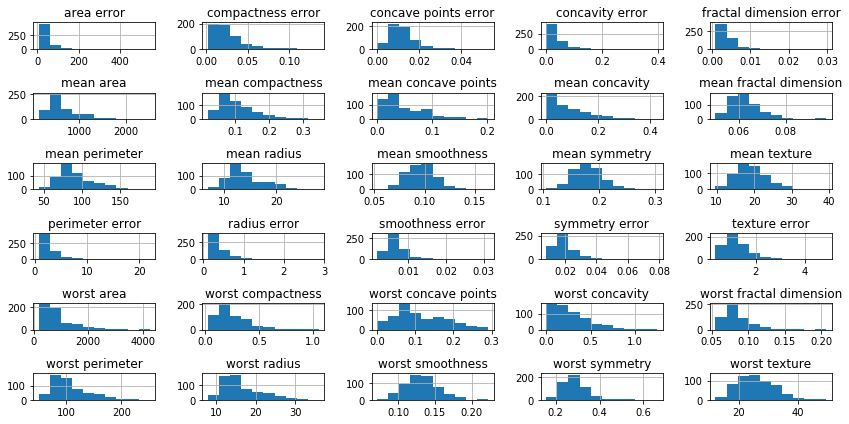

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(X,columns=data.feature_names) #convert X to pandas dataframe
#df.describe() #stats of each variable

hist = df.hist(figsize=(12,6))#make a histogram of each variable
plt.tight_layout()

df.isnull().values.any()#check whether any value is missing 


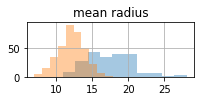

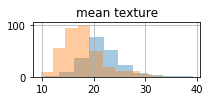

In [0]:
df_all = pd.DataFrame(df)
df_all['class'] = y

for var_name in data.feature_names[:2]:
  df_all.groupby("class")[var_name].hist(alpha=0.4,figsize=(3,1))
  plt.title(var_name)
  plt.show()


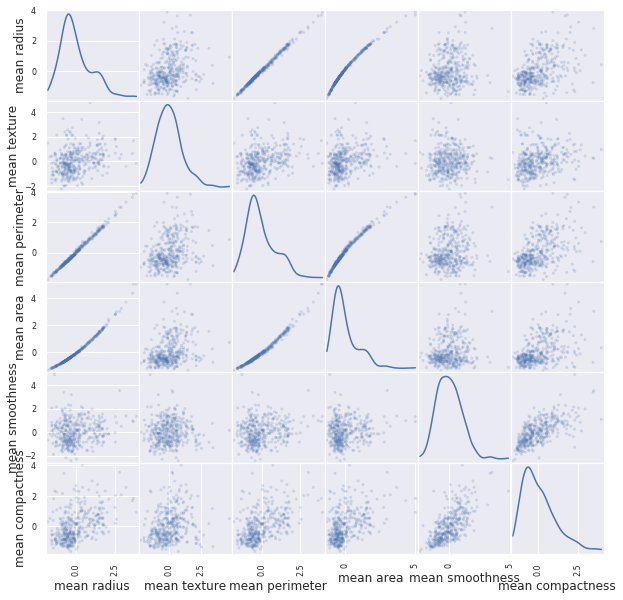

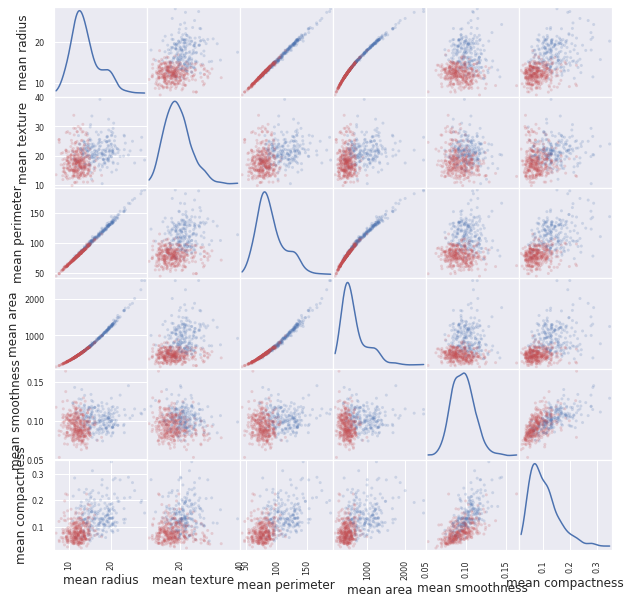

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[data.feature_names[:6]], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

colors = list('r' if i==1 else 'b' for i in df_all['class'])
scatter_matrix(df_all[data.feature_names[:6]], alpha=0.2, figsize=(10, 10), diagonal='kde',color=colors)
plt.show()


### Data Pre-processing (Scaling)



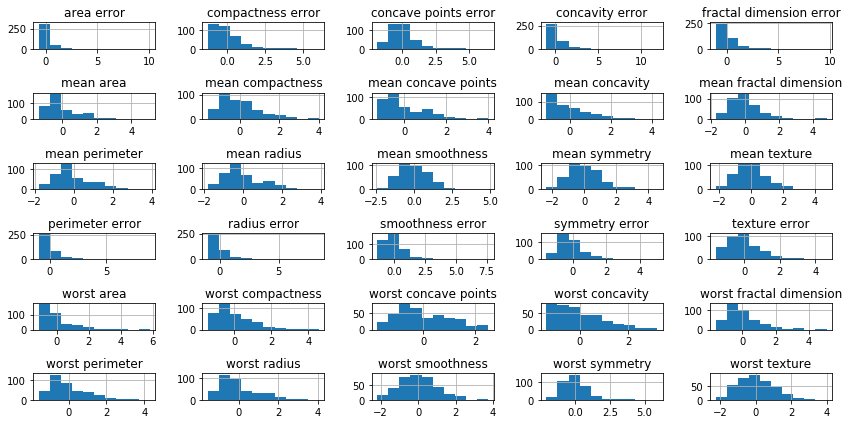

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

import pandas as pd
df = pd.DataFrame(X_train_scaled,columns=data.feature_names) #convert X to pandas dataframe
hist = df.hist(figsize=(12,6))#make a histogram of each variable
plt.tight_layout()

### SVM Definition and Training

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

svm.fit(X_train_scaled,y_train)



SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predictions and Evaluation

HITS TRAIN SET 377
GLOBAL ACCURACY TRAIN SET (MANUAL) 0.989501312335958
GLOBAL ACCURACY TRAIN SET (LIB) 0.989501312335958

CONFUSION MATRIX TRAIN SET:



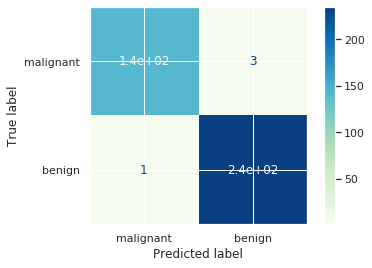


DETAILED REPORT TRAIN SET:

              precision    recall  f1-score   support

   malignant       0.99      0.98      0.99       145
      benign       0.99      1.00      0.99       236

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



 ------------------------------------- 


HITS TEST SET 183
GLOBAL ACCURACY TEST SET (MANUAL) 0.973404255319149
GLOBAL ACCURACY TEST SET (LIB) 0.973404255319149

CONFUSION MATRIX TEST SET:



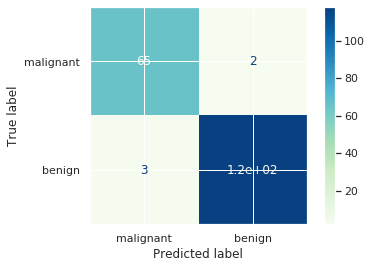


DETAILED REPORT TEST SET:

              precision    recall  f1-score   support

   malignant       0.96      0.97      0.96        67
      benign       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [0]:
y_pred_train = svm.predict(X_train_scaled)

#print(y_pred.shape,y_train.shape)
print("HITS TRAIN SET",np.sum(y_pred_train==y_train))
print("GLOBAL ACCURACY TRAIN SET (MANUAL)",np.sum(y_pred_train==y_train)/len(y_train))
print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))


from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

cm = confusion_matrix(y_train, y_pred_train)
print("\nCONFUSION MATRIX TRAIN SET:\n")
plot_confusion_matrix(svm, X_train_scaled, y_train, display_labels=data.target_names,cmap=plt.cm.GnBu)
plt.show()

from sklearn.metrics import classification_report
print("\nDETAILED REPORT TRAIN SET:\n")
print(classification_report(y_train, y_pred_train, target_names=data.target_names))

print("\n\n ------------------------------------- \n\n")
y_pred_test = svm.predict(X_test_scaled)

#print(y_pred.shape,y_train.shape)
print("HITS TEST SET",np.sum(y_pred_test==y_test))
print("GLOBAL ACCURACY TEST SET (MANUAL)",np.sum(y_pred_test==y_test)/len(y_test))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))

cm = confusion_matrix(y_test, y_pred_test)
print("\nCONFUSION MATRIX TEST SET:\n")
plot_confusion_matrix(svm, X_test_scaled, y_test, display_labels=data.target_names,cmap=plt.cm.GnBu)
plt.show()

print("\nDETAILED REPORT TEST SET:\n")
print(classification_report(y_test, y_pred_test, target_names=data.target_names))

### Examining the Trained Model

#### Bias and Feature Weights

VALUE OF INTERCEPT 0.022404566158159583
PERC. POSITIVE CLASS: 0.6194225721784777
PERC. NEGATIVE CLASS: 0.3805774278215223


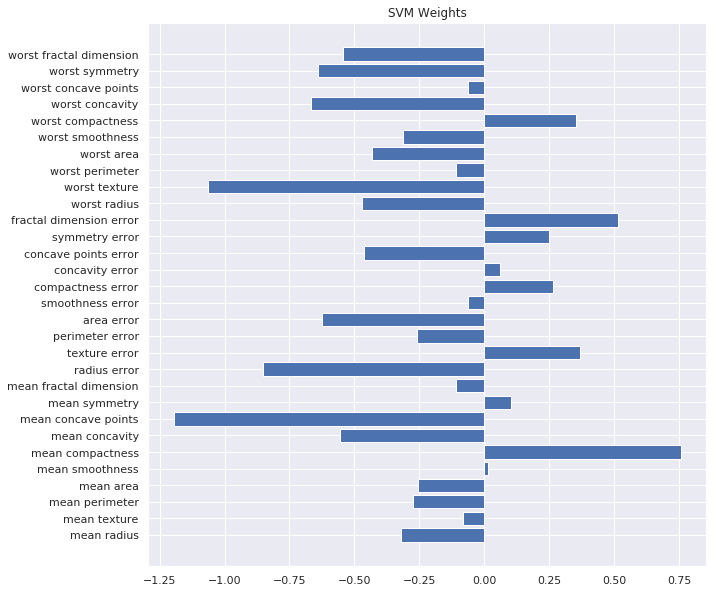

In [0]:

w = svm.coef_[0]
b = svm.intercept_[0]

#print(w.shape)
print("VALUE OF INTERCEPT", b)
print("PERC. POSITIVE CLASS:", np.sum(y_train==1)/len(y_train))
print("PERC. NEGATIVE CLASS:", np.sum(y_train==0)/len(y_train))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
var_idx = range(0,30)
ax.barh(var_idx, w, align='center')
ax.set_yticks(var_idx)
ax.set_yticklabels(data.feature_names)
plt.title("SVM Weights")
plt.show()



#### Feature Importance?

RANDOM FOREST ACCURACY TEST SET (LIB) 0.9627659574468085
SVM ACCURACY TEST SET (LIB) 0.973404255319149


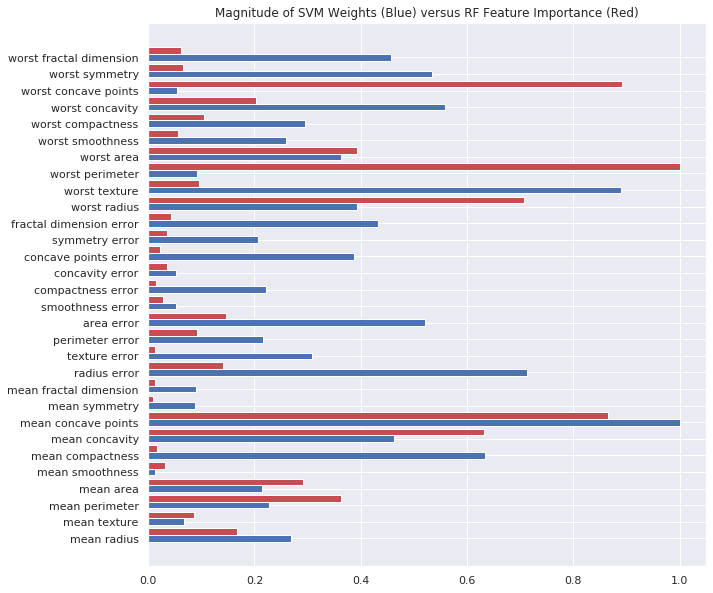

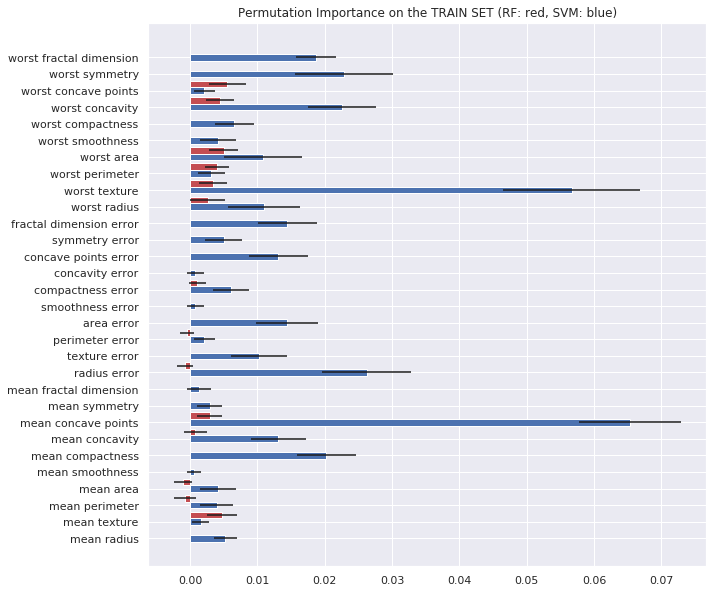

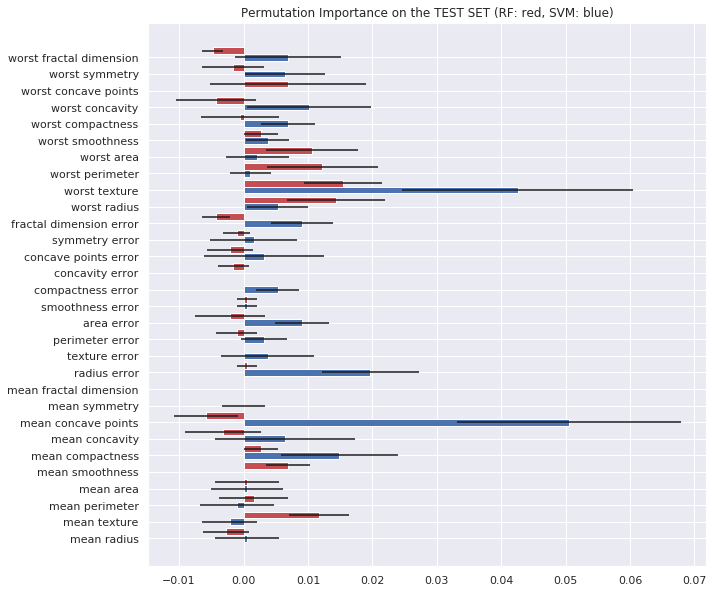

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train_scaled,y_train)
print("RANDOM FOREST ACCURACY TEST SET (LIB)",rf.score(X_test_scaled,y_test))
print("SVM ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))

weights_rf = rf.feature_importances_

bwidth = 0.4
fig, ax = plt.subplots(figsize=(10,10))
var_idx = np.arange(0,30)
ax.barh(var_idx, np.abs(w)/np.max(np.abs(w)), align='center', color='b',height=bwidth)
ax.barh(var_idx+bwidth, weights_rf/np.max(weights_rf), align='center', color='r',height=bwidth)
ax.set_yticks(var_idx)
ax.set_yticklabels(data.feature_names)
plt.title("Magnitude of SVM Weights (Blue) versus RF Feature Importance (Red)")
plt.show()


from sklearn.inspection import permutation_importance

scores_pi_svm = permutation_importance(svm, X_train_scaled, y_train, n_repeats=10)
scores_pi_rf = permutation_importance(rf, X_train_scaled, y_train, n_repeats=10)

bwidth = 0.4
fig, ax = plt.subplots(figsize=(10,10))
var_idx = np.arange(0,30)
ax.barh(var_idx, scores_pi_svm.importances_mean, align='center', color='b',height=bwidth,xerr=scores_pi_svm.importances_std)
ax.barh(var_idx+bwidth, scores_pi_rf.importances_mean, align='center', color='r',height=bwidth,xerr=scores_pi_rf.importances_std)
ax.set_yticks(var_idx)
ax.set_yticklabels(data.feature_names)
plt.title("Permutation Importance on the TRAIN SET (RF: red, SVM: blue)")
plt.show()


scores_pi_svm = permutation_importance(svm, X_test_scaled, y_test, n_repeats=10)
scores_pi_rf = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10)

bwidth = 0.4
fig, ax = plt.subplots(figsize=(10,10))
var_idx = np.arange(0,30)
ax.barh(var_idx, scores_pi_svm.importances_mean, align='center', color='b',height=bwidth,xerr=scores_pi_svm.importances_std)
ax.barh(var_idx+bwidth, scores_pi_rf.importances_mean, align='center', color='r',height=bwidth,xerr=scores_pi_rf.importances_std)
ax.set_yticks(var_idx)
ax.set_yticklabels(data.feature_names)
plt.title("Permutation Importance on the TEST SET (RF: red, SVM: blue)")
plt.show()


#### Mistakes and Support Vectors

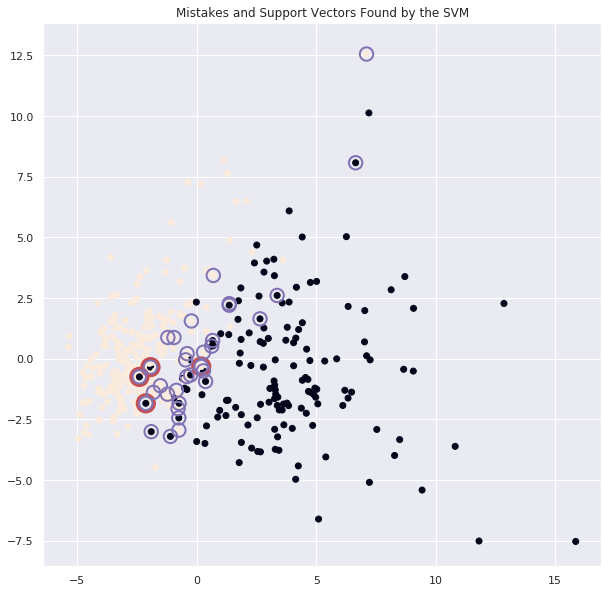

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_proyected = pca.transform(X_train_scaled)
y_pred_train = svm.predict(X_train_scaled)
decision_train = svm.decision_function(X_train_scaled)


fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_train_proyected[:,0],X_train_proyected[:,1],c=y_train)

X_mistakes = X_train_scaled[y_train != y_pred_train]
X_mistakes_proyected = pca.transform(X_mistakes)
ax.scatter(X_mistakes_proyected[:,0],X_mistakes_proyected[:,1], s=280, facecolors='none',edgecolors='r',linewidth=3.5)

sv = svm.support_vectors_ #support vectors
nsv = svm.n_support_ #number of support vectors
sv_idx = svm.support_ #indices of support vectors
sv_proyected = pca.transform(sv)

ax.scatter(sv_proyected[:,0],sv_proyected[:,1], s=180, facecolors='none',edgecolors='m',linewidth=2)

plt.title("Mistakes and Support Vectors Found by the SVM")
plt.show()



### Effect and Selection of C

#### Effect of Regularization on the Prediction Error

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


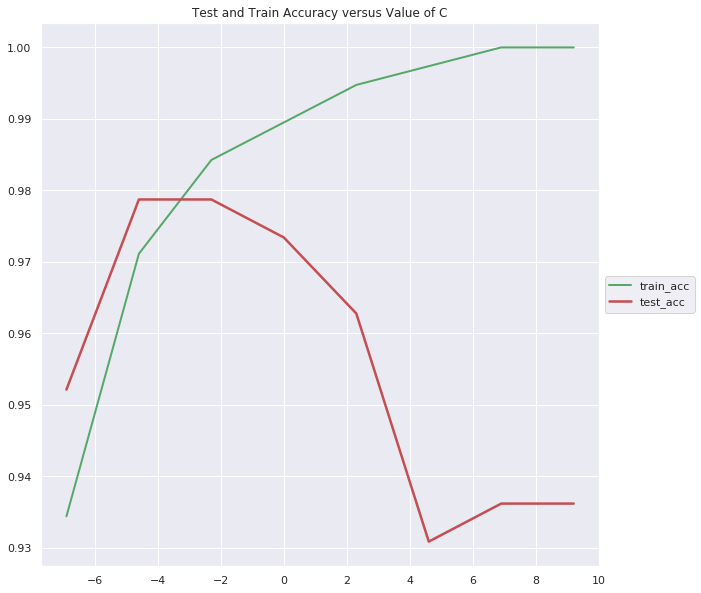

In [0]:
from sklearn.svm import SVC

C_values = np.logspace(-3, 4, num=8, endpoint=True, base=10.0)
print(C_values)

test_accuracy = []
train_accuracy = []

for C_val in C_values:
  svm = SVC(kernel='linear', C=C_val)
  svm.fit(X_train_scaled,y_train)
  train_accuracy.append(svm.score(X_train_scaled,y_train))
  test_accuracy.append(svm.score(X_test_scaled,y_test))


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.log(C_values),train_accuracy,color='g',lw=2.,label='train_acc')
ax.plot(np.log(C_values),test_accuracy,color='r',lw=2.5,label='test_acc')
plt.title("Test and Train Accuracy versus Value of C")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#### Selecting on a Validation Set

51065
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


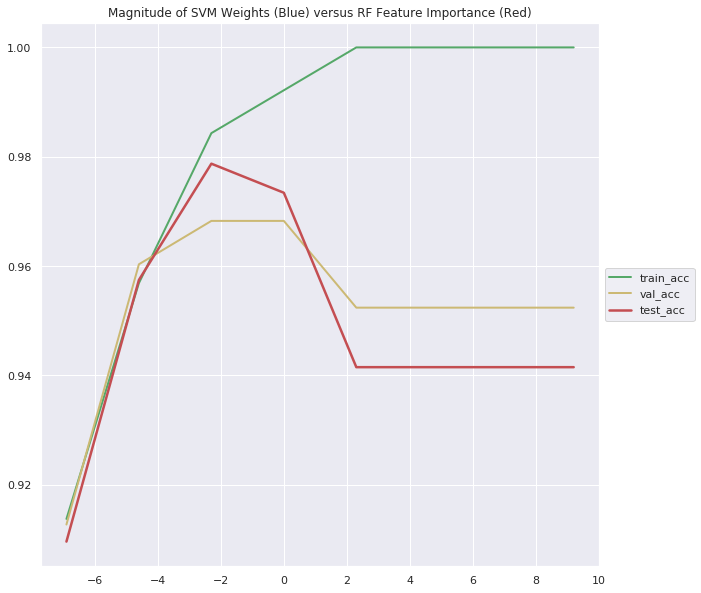

In [0]:
from sklearn.model_selection import train_test_split
import random, sys

rn = random.randint(0, 100000)
print(rn)#61533,56650,27751

X_train_sel, X_val, y_train_sel, y_val = train_test_split(X_train_scaled, y_train, test_size=0.33, random_state=27751)

C_values = np.logspace(-3, 4, num=8, endpoint=True, base=10.0)
print(C_values)

test_accuracy = []
val_accuracy = []
train_accuracy = []

for C_val in C_values:
  svm = SVC(kernel='linear', C=C_val)
  svm.fit(X_train_sel,y_train_sel)
  train_accuracy.append(svm.score(X_train_sel,y_train_sel))
  val_accuracy.append(svm.score(X_val,y_val))
  test_accuracy.append(svm.score(X_test_scaled,y_test))


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.log(C_values),train_accuracy,color='g',lw=2.,label='train_acc')
ax.plot(np.log(C_values),val_accuracy,color='y',lw=2.,label='val_acc')
ax.plot(np.log(C_values),test_accuracy,color='r',lw=2.5,label='test_acc')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Magnitude of SVM Weights (Blue) versus RF Feature Importance (Red)")
plt.show()

#### Selecting using Cross-Validation


##### Almost By Hand

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


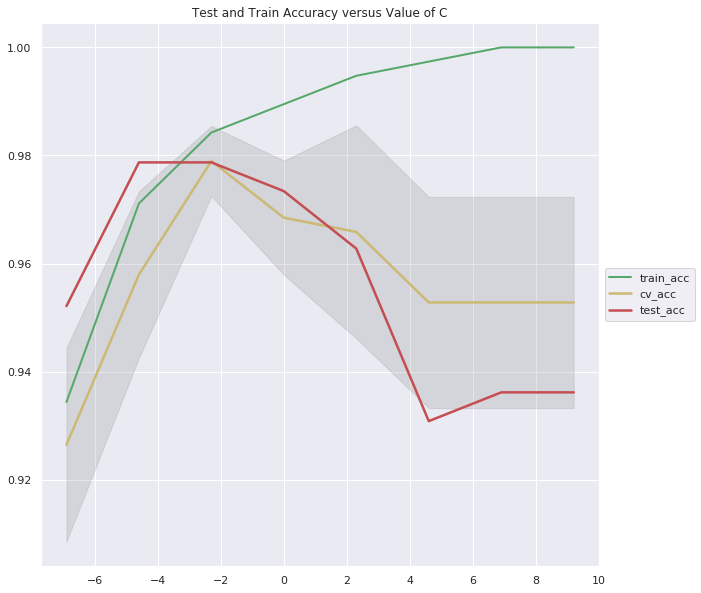

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

C_values = np.logspace(-3, 4, num=8, endpoint=True, base=10.0)
print(C_values)

test_accuracy = []
cross_val_accuracy = []
cross_val_std = []
train_accuracy = []

for C_val in C_values:
  svm = SVC(kernel='linear', C=C_val)
  cv_output = cross_val_score(svm, X_train_scaled, y_train, cv=5)
  cross_val_accuracy.append(cv_output.mean())
  cross_val_std.append(cv_output.std())
  svm = SVC(kernel='linear', C=C_val)
  svm.fit(X_train_scaled,y_train)
  train_accuracy.append(svm.score(X_train_scaled,y_train))
  test_accuracy.append(svm.score(X_test_scaled,y_test))

cross_val_accuracy = np.array(cross_val_accuracy)
cross_val_std = np.array(cross_val_std)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.log(C_values),train_accuracy,color='g',lw=2.,label='train_acc')
ax.plot(np.log(C_values),cross_val_accuracy,color='y',lw=2.5,label='cv_acc')
plt.fill_between(np.log(C_values), cross_val_accuracy-cross_val_std, cross_val_accuracy+cross_val_std,color='gray', alpha=0.2)
ax.plot(np.log(C_values),test_accuracy,color='r',lw=2.5,label='test_acc')
plt.title("CV, Test, Train Accuracy versus Value of C")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


##### Using a Specialized SKlearn Function

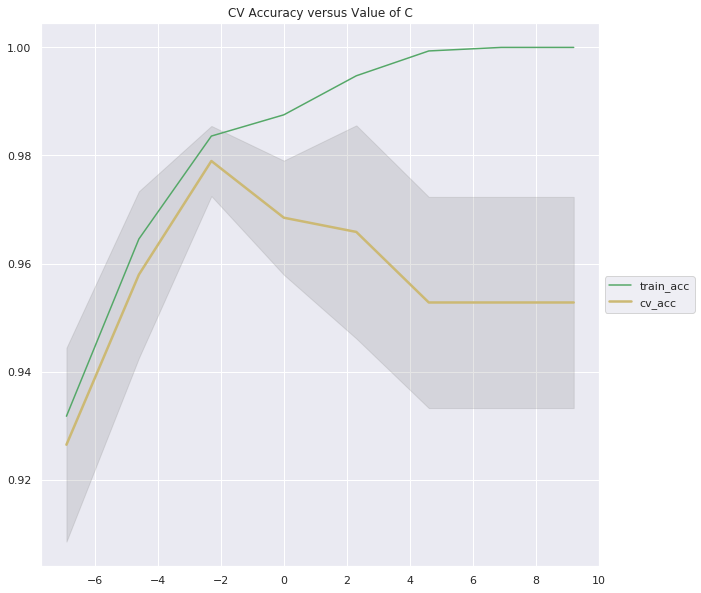

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear'], 'C': np.logspace(-3, 4, num=8, endpoint=True, base=10.0)}
svm = SVC()
gs = GridSearchCV(svm, parameters,return_train_score=True)
gs.fit(X_train_scaled,y_train)


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.log(C_values),gs.cv_results_['mean_train_score'],color='g',lw=1.5,label='train_acc')
ax.plot(np.log(C_values),gs.cv_results_['mean_test_score'],color='y',lw=2.5,label='cv_acc')
plt.fill_between(np.log(C_values), gs.cv_results_['mean_test_score']-gs.cv_results_['std_test_score'], gs.cv_results_['mean_test_score']+gs.cv_results_['std_test_score'],color='gray', alpha=0.2)
plt.title("CV Accuracy versus Value of C")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## Building a Non-Linear SVM

### [Google Colab Only] Downloading the Data from GitHub

In [37]:
!wget --no-check-certificate http://jricardon.github.io/spambase/mushrooms.csv
mushroom_file  = open("mushrooms.csv",'r')

URL transformed to HTTPS due to an HSTS policy
--2020-01-24 13:03:17--  https://jricardon.github.io/spambase/mushrooms.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/csv]
Saving to: ‘mushrooms.csv.4’

mushrooms.csv.4     100%[===================>] 365.24K  --.-KB/s    in 0.05s   

2020-01-24 13:03:17 (6.78 MB/s) - ‘mushrooms.csv.4’ saved [374003/374003]



### [Anaconda with python-wget] Downloading the Data from GitHub

In [0]:
import wget
url = 'http://jricardon.github.io/spambase/spambase/mushrooms.csv'
mushroom_file  = wget.download(url)



### Loading and Exploring the Dataset

Classes: 
1.   poisonous (p)
2.   edible (e)

Some of the attributes:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
... 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

All the atrributes are categorical (codes/strings).


  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]
   class_e  class_p  cap-shape_b  ...  habitat_p  habitat_u  habitat_w
0        0        1            0  ...          0          1          0
1        1        0            0  ...          0          0          0
2        1        0            1  ...          0          0          0
3        0        1            0  ...          0          1          0
4        1        0            0  ...          0          0          0

[5 rows x 119 columns]


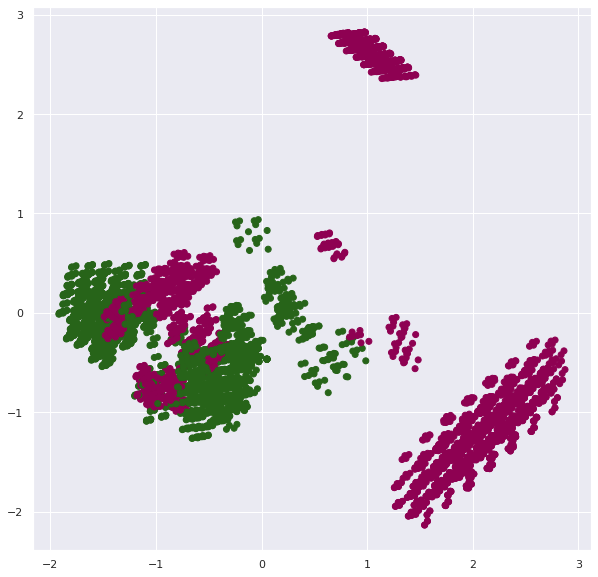

In [46]:
##if you run it twice you need to re-run the previous cell
if mushroom_df is None:
  mushroom_df = pd.read_csv(mushroom_file)

print(mushroom_df.head())
#print(mushroom_df.columns)

mushroom_df_encoded = pd.get_dummies(mushroom_df)#Convert categorical variable into indicator binary variables.
print(mushroom_df_encoded.head())
#print(mushroom_df_encoded.columns)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = mushroom_df_encoded.drop(['class_e','class_p'], axis=1).values
y = mushroom_df_encoded['class_e'].values
scaler = StandardScaler(with_mean=True, with_std=True)
#X = scaler.fit_transform(X)
X_proyected = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_proyected[:,0],X_proyected[:,1],c=y,cmap=plt.get_cmap("PiYG"))
plt.show()



### Preparing the Data


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = mushroom_df_encoded.drop(['class_e','class_p'], axis=1).values
y = mushroom_df_encoded['class_p'].values #so 1 is poisonous and 0 edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaling = False

if scaling:
  scaler = StandardScaler(with_mean=True, with_std=True)
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

else:
  X_train_scaled = X_train
  X_test_scaled = X_test


### Training a Non-Linear Model

In [107]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, gamma=0.02)
#svm = SVC(kernel='poly', degree=5, C=1)

svm.fit(X_train_scaled,y_train)

print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))
print(classification_report(y_test, svm.predict(X_test_scaled), target_names=["normal","fraud"]))


GLOBAL ACCURACY TRAIN SET (LIB) 0.9990813889399228
GLOBAL ACCURACY TEST SET (LIB) 0.9988810145468109
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      1378
       fraud       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



### Visualizing the Model

mistakes= 3


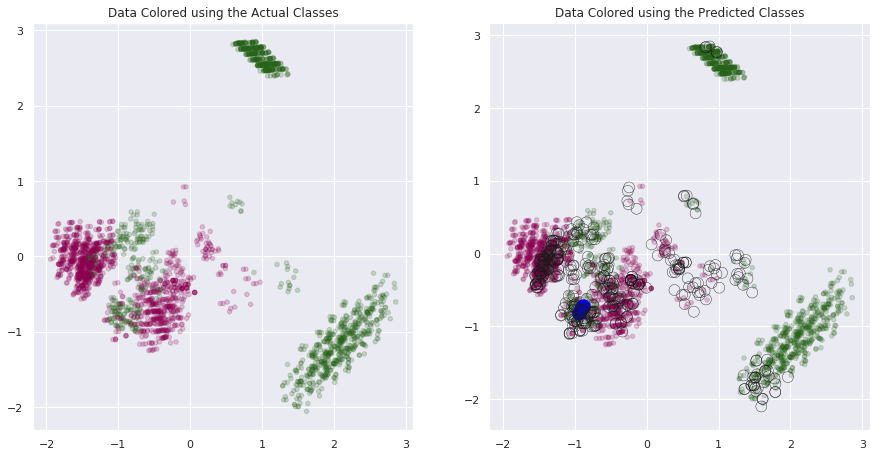

In [152]:
from sklearn.decomposition import PCA

svm = SVC(kernel='rbf', C=1, gamma=0.02)
svm.fit(X_train_scaled,y_train)

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_test_proyected = pca.transform(X_test_scaled)
y_pred_test = svm.predict(X_test_scaled)

fig, ax = plt.subplots(figsize=(15,7.5),nrows=1, ncols=2)

ax[0].scatter(X_test_proyected[:,0],X_test_proyected[:,1],c=y_test,cmap=plt.get_cmap("PiYG"),s=20,alpha=.2)
ax[0].set_title("Data Colored using the Actual Classes")

ax[1].scatter(X_test_proyected[:,0],X_test_proyected[:,1],c=y_pred_test,cmap=plt.get_cmap("PiYG"),s=20,alpha=.2)

X_mistakes = X_test_scaled[y_test != y_pred_test]
print("mistakes=", len(X_mistakes))
if len(X_mistakes) > 0:
  X_mistakes_proyected = pca.transform(X_mistakes)
  ax[1].scatter(X_mistakes_proyected[:,0],X_mistakes_proyected[:,1], s=120, facecolors='blue',edgecolors='blue',linewidth=3.5,cmap=plt.get_cmap("PiYG"))

sv = svm.support_vectors_ 
sv_proyected = pca.transform(sv)

ax[1].scatter(sv_proyected[:,0],sv_proyected[:,1], s=120, facecolors='none',edgecolors='k',linewidth=0.4,cmap=plt.get_cmap("PiYG"))
ax[1].set_title("Data Colored using the Predicted Classes")


plt.show()


mistakes= 148


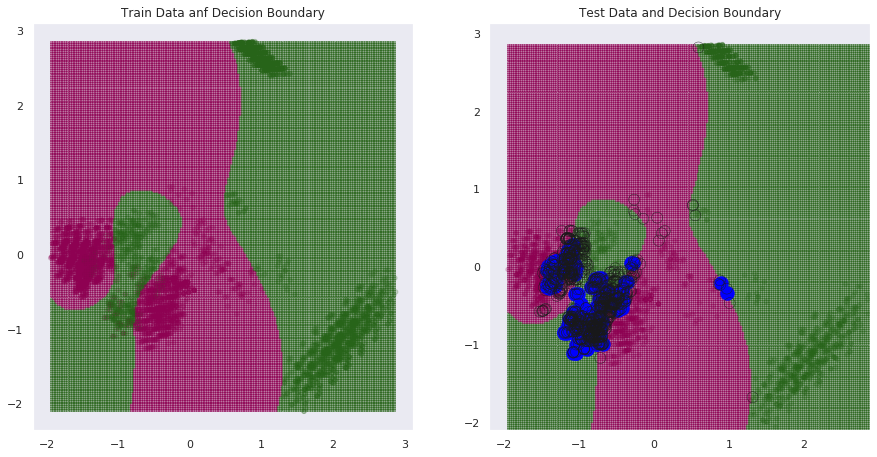

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_proyected = pca.transform(X_train_scaled)
X_test_proyected = pca.transform(X_test_scaled)

svm = SVC(kernel='rbf', C=500, gamma=0.2)
svm.fit(X_train_proyected,y_train)

x_min = np.min(X_train_proyected[:,0]); x_max = np.max(X_train_proyected[:,0])
y_min = np.min(X_train_proyected[:,1]); y_max = np.max(X_train_proyected[:,1])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(15,7.5),nrows=1, ncols=2)

ax[0].scatter(X_train_proyected[:,0],X_train_proyected[:,1],c=y_train,cmap=plt.get_cmap("PiYG"),s=20,alpha=.2)
ax[0].set_title("Train Data anf Decision Boundary")
ax[0].pcolormesh(XX, YY, Z, cmap=plt.get_cmap("PiYG"),alpha=.5)

ax[1].scatter(X_test_proyected[:,0],X_test_proyected[:,1],c=y_test,cmap=plt.get_cmap("PiYG"),s=20,alpha=.2)
ax[1].pcolormesh(XX, YY, Z, cmap=plt.get_cmap("PiYG"),alpha=.5)

X_mistakes = X_test_proyected[y_test != svm.predict(X_test_proyected)]
print("mistakes=", len(X_mistakes))
if len(X_mistakes) > 0:
  ax[1].scatter(X_mistakes[:,0],X_mistakes[:,1], s=120, facecolors='blue',edgecolors='blue',linewidth=3.5,cmap=plt.get_cmap("PiYG"))

sv = svm.support_vectors_ 
ax[1].scatter(sv[:,0],sv[:,1], s=120, facecolors='none',edgecolors='k',linewidth=0.4,cmap=plt.get_cmap("PiYG"))
ax[1].set_title("Test Data and Decision Boundary")


plt.show()


## A More Challenging Problem

### [Google Colab Only] Downloading the Data from GitHub

In [7]:
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_1.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_2.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_3.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_4.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_5.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_6.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_7.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/creditcard_part_8.csv

files = []
for idx in range(1,9):
  file_credit = open("creditcard_part_%d.csv"%idx,'r')
  files.append(file_credit)

URL transformed to HTTPS due to an HSTS policy
--2020-01-24 12:20:24--  https://jricardon.github.io/spambase/creditcard_part_1.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21089584 (20M) [text/csv]
Saving to: ‘creditcard_part_1.csv.2’

creditcard_part_1.c 100%[===================>]  20.11M  57.8MB/s    in 0.3s    

2020-01-24 12:20:24 (57.8 MB/s) - ‘creditcard_part_1.csv.2’ saved [21089584/21089584]

URL transformed to HTTPS due to an HSTS policy
--2020-01-24 12:20:25--  https://jricardon.github.io/spambase/creditcard_part_2.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

### [Anaconda with python-wget] Downloading the Data from GitHub

In [0]:
import wget
files = []
for idx in range(1,9):
  url = 'http://jricardon.github.io/spambase/creditcard_part_%d.csv'%idx
  filename = wget.download(url)
  files.append(filename)


ModuleNotFoundError: ignored

### Loading and Exploring the Dataset

rows x columns (284807, 31)
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


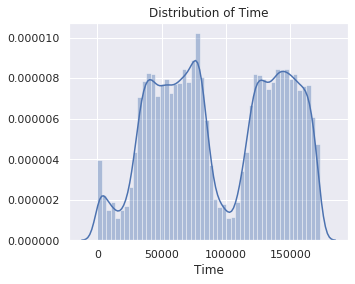

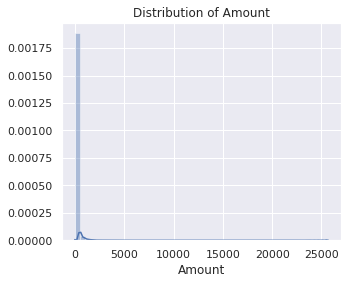

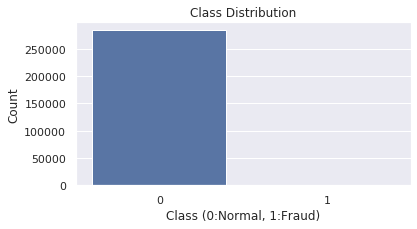

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

parts = []
for idx in range(1,9):
    credit_part = pd.read_csv(files[idx-1])#("creditcard_part_%d.csv"%idx)
    parts.append(credit_part)
  
credit_data = pd.concat(parts)
print("rows x columns",credit_data.shape)

print(credit_data.head())

plt.figure(figsize=(5,4))
plt.title('Distribution of Time')
sns.distplot(credit_data["Time"])

plt.figure(figsize=(5,4))
plt.title('Distribution of Amount')
sns.distplot(credit_data["Amount"])

class_counts = credit_data["Class"].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=class_counts.index, y=class_counts)

plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class (0:Normal, 1:Fraud)')
plt.show()


### Exploring Unbalancing

(284807, 30) (284807,)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


RANDOM STATE 43479
(1476, 30) (1476,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


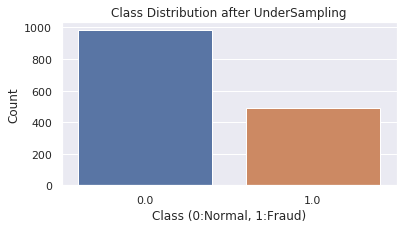

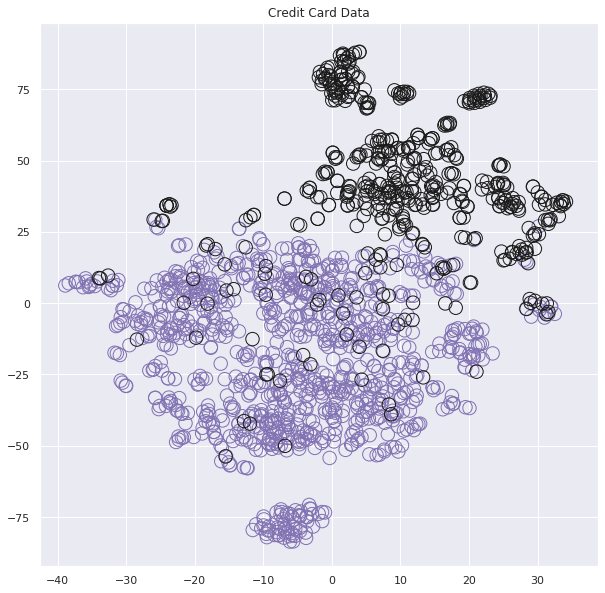

In [0]:
data = credit_data.to_numpy()
X = data[:,:-1]
y = data[:,-1]
print(X.shape,y.shape)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random

rn = random.randint(0, 100000)#20840, 69411, 91423, 77387
print("RANDOM STATE", rn)

under = RandomUnderSampler(sampling_strategy=0.5,random_state=rn)
X, y = under.fit_resample(X, y)
print(X.shape,y.shape)

under_df = pd.DataFrame(X)
under_df["Class"] = y
class_counts = under_df ["Class"].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=class_counts.index, y=class_counts)

plt.title('Class Distribution after UnderSampling')
plt.ylabel('Count')
plt.xlabel('Class (0:Normal, 1:Fraud)')


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X)
X_scaled = scaler.transform(X)
#X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
#X_proyected = pca.fit_transform(X_scaled) #try not scaling

tsne = TSNE(n_components=2, random_state=rn)
X_proyected = tsne.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(10,10))

#y=1 is fraud
ax.scatter(X_proyected[y==0,0],X_proyected[y==0,1],cmap=plt.get_cmap("PiYG"),s=180,facecolors='none',edgecolors='m')
ax.scatter(X_proyected[y==1,0],X_proyected[y==1,1],cmap=plt.get_cmap("PiYG"),s=180,facecolors='none',edgecolors='k')


plt.title("Credit Card Data")
plt.show()

### Preparing the Data

(190820, 30) (190820,)
345
(3105, 30) (3105,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


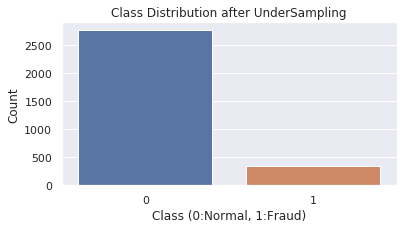

(5520, 30) (5520,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


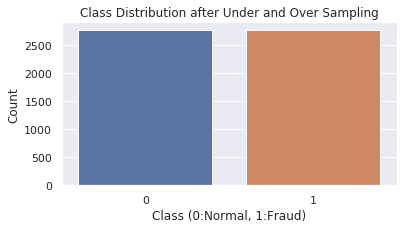

In [9]:
X = credit_data.drop('Class', axis=1).values 
y = credit_data['Class'].values

rn = 20840

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rn)

print(X_train.shape,y_train.shape)
print(np.sum(y_train==1))
#because otherwise is too big
under = RandomUnderSampler(sampling_strategy=0.125,random_state=rn)
X_train, y_train = under.fit_resample(X_train, y_train)

print(X_train.shape,y_train.shape)

final_df = pd.DataFrame(X_train)
final_df["Class"] = y_train
class_counts = final_df["Class"].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=class_counts.index, y=class_counts)
plt.title('Class Distribution after UnderSampling')
plt.ylabel('Count')
plt.xlabel('Class (0:Normal, 1:Fraud)')
plt.show()

over = SMOTE(sampling_strategy=1,random_state=rn)
X_train, y_train = over.fit_resample(X_train, y_train)

print(X_train.shape,y_train.shape)

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

final_df = pd.DataFrame(X_train_scaled)
final_df["Class"] = y_train
class_counts = final_df["Class"].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=class_counts.index, y=class_counts)
plt.title('Class Distribution after Under and Over Sampling')
plt.ylabel('Count')
plt.xlabel('Class (0:Normal, 1:Fraud)')
plt.show()



### Linear SVM

In [10]:
from sklearn.svm import SVC
class_weights = dict()

class_weights[0] = 10
class_weights[1] = 0.1

#svm = SVC(kernel='linear', C=1,class_weight=class_weights)
svm = SVC(kernel='linear', C=1)

svm.fit(X_train_scaled,y_train)

print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))

print("\nDETAILED REPORT TEST SET:\n")
print(classification_report(y_test, svm.predict(X_test_scaled), target_names=["normal","fraud"]))

GLOBAL ACCURACY TRAIN SET (LIB) 0.9755434782608695
GLOBAL ACCURACY TEST SET (LIB) 0.9875408301148031

DETAILED REPORT TEST SET:

              precision    recall  f1-score   support

      normal       1.00      0.99      0.99     93840
       fraud       0.10      0.90      0.19       147

    accuracy                           0.99     93987
   macro avg       0.55      0.95      0.59     93987
weighted avg       1.00      0.99      0.99     93987



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


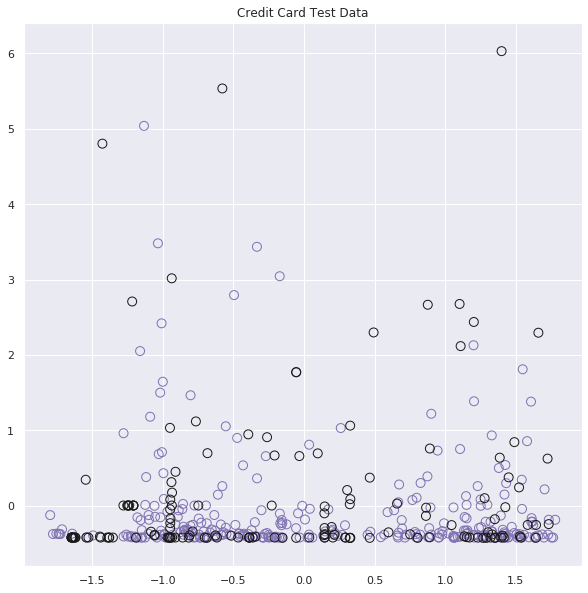

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

under = RandomUnderSampler(sampling_strategy=0.5,random_state=rn)
X_test_scaled_s, y_test_s = under.fit_resample(X_test_scaled, y_test)

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_proyected = pca.transform(X_test_scaled) #try not scaling

X_proyected = np.zeros((len(X_test_scaled_s),2))
X_proyected[:,0] = X_test_scaled_s[:,0]
X_proyected[:,1] = X_test_scaled_s[:,-1]

#tsne = TSNE(n_components=2, random_state=rn)
#X_proyected = tsne.fit_transform(X_test_scaled_s)

fig, ax = plt.subplots(figsize=(10,10))

#y=1 is fraud
ax.scatter(X_proyected[y_test_s==0,0],X_proyected[y_test_s==0,1],cmap=plt.get_cmap("PiYG"),s=80,facecolors='none',edgecolors='m')
ax.scatter(X_proyected[y_test_s==1,0],X_proyected[y_test_s==1,1],cmap=plt.get_cmap("PiYG"),s=80,facecolors='none',edgecolors='k')

plt.title("Credit Card Test Data")
plt.show()

### Non-Linear SVM

In [11]:
from sklearn.svm import SVC
class_weights = dict()

class_weights[0] = 10
class_weights[1] = 0.1

#svm = SVC(kernel='rbf', C=1, gamma=0.02,class_weight=class_weights)
svm = SVC(kernel='rbf', C=1, gamma=0.02)
#svm = SVC(kernel='poly', degree=5, C=1)

svm.fit(X_train_scaled,y_train)

print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))
print(classification_report(y_test, svm.predict(X_test_scaled), target_names=["normal","fraud"]))


GLOBAL ACCURACY TRAIN SET (LIB) 0.9760869565217392
GLOBAL ACCURACY TEST SET (LIB) 0.9919776139253301
              precision    recall  f1-score   support

      normal       1.00      0.99      1.00     93840
       fraud       0.15      0.90      0.26       147

    accuracy                           0.99     93987
   macro avg       0.58      0.95      0.63     93987
weighted avg       1.00      0.99      0.99     93987



### Model Selection




#### Using Cross-validation to Choose the Parameters

In [23]:
from sklearn.model_selection import GridSearchCV

#### TUNE THE LINEAR MACHINE
print("\nTUNNING THE LINEAR SVM ...\n")
parameters_linear = {'C': np.logspace(-1, 1, num=3, endpoint=True, base=10.0), 'kernel': ['linear']}

svm = SVC()
grid_result_linear = GridSearchCV(svm, parameters_linear,return_train_score=True)
grid_result_linear.fit(X_train_scaled,y_train)

means = grid_result_linear.cv_results_['mean_test_score']
stds = grid_result_linear.cv_results_['std_test_score']
params = grid_result_linear.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))#param is a dict with the fields you created
    #print(param['kernel'],param['C'])#you can access the fields to see the param values

print("\nBEST RESULTS FOR LINEAR SVM ...\n")
print("PARAMS: ",grid_result_linear.best_params_)
print("SCORE: ",grid_result_linear.best_score_)

#### TUNE THE KERNELIZED MACHINE
print("\nTUNNING THE NON-LINEAR SVM ...\n")
parameters_rbf = {'C': np.logspace(-1, 1, num=3, endpoint=True, base=10.0), 'gamma': [0.01, 0.1], 'kernel': ['rbf']}

svm = SVC()
grid_result_rbf = GridSearchCV(svm, parameters_rbf,return_train_score=True)
grid_result_rbf.fit(X_train_scaled,y_train)

means = grid_result_rbf.cv_results_['mean_test_score']
stds = grid_result_rbf.cv_results_['std_test_score']
params = grid_result_rbf.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))#param is a dict with the fields you created
    #print(param['kernel'],param['C'])#you can access the fields to see the param values

print("\nBEST RESULTS FOR NON-LINEAR SVM ...\n")
print("PARAMS: ",grid_result_rbf.best_params_)
print("SCORE: ",grid_result_rbf.best_score_)

#### TUNE THE LINEAR MACHINE AND NON-LINEAR AT THE SAME TIME
print("\nTUNNING ONE SHOT ...\n")
parameters = [
  {'C': np.logspace(-1, 1, num=3, endpoint=True, base=10.0), 'kernel': ['linear']},
  {'C': np.logspace(-1, 1, num=3, endpoint=True, base=10.0), 'gamma': [0.01, 0.02, 0.1, 0.2], 'kernel': ['rbf']},
 ]

svm = SVC()
grid_result = GridSearchCV(svm, parameters,return_train_score=True)
grid_result.fit(X_train_scaled,y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))#param is a dict with the fields you created
    #print(param['kernel'],param['C'])#you can access the fields to see the param values

print("\nBEST RESULTS ...\n")
print("PARAMS: ",grid_result.best_params_)
print("SCORE: ",grid_result.best_score_)




TUNNING THE LINEAR SVM ...

0.969928 (0.010921) with: {'C': 0.1, 'kernel': 'linear'}
0.974819 (0.010507) with: {'C': 1.0, 'kernel': 'linear'}
0.977355 (0.011515) with: {'C': 10.0, 'kernel': 'linear'}

BEST RESULTS FOR LINEAR SVM ...

PARAMS:  {'C': 10.0, 'kernel': 'linear'}
SCORE:  0.9773550724637682

TUNNING THE NON-LINEAR SVM ...

0.938587 (0.007737) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.950725 (0.008392) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.968659 (0.008718) with: {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.985507 (0.006170) with: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.979529 (0.008904) with: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.993297 (0.002723) with: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

BEST RESULTS FOR NON-LINEAR SVM ...

PARAMS:  {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
SCORE:  0.9932971014492754

TUNNING ONE SHOT ...

0.969928 (0.010921) with: {'C': 0.1, 'kernel': 'linear'}
0.974819 (0.010507) with: {'C': 1.0, 'kernel': 'linear

#### Training & Evaluating the Best Model

In [21]:
best_params = grid_result.best_params_

svm = SVC(kernel=best_params['kernel'],C=best_params['C'],gamma=best_params['gamma'])

svm.fit(X_train_scaled,y_train)

print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))

print("\nDETAILED REPORT TEST SET:\n")
print(classification_report(y_test, svm.predict(X_test_scaled), target_names=["normal","fraud"]))


GLOBAL ACCURACY TRAIN SET (LIB) 0.998731884057971
GLOBAL ACCURACY TEST SET (LIB) 0.9898709395980295

DETAILED REPORT TEST SET:

              precision    recall  f1-score   support

      normal       1.00      0.99      0.99     93840
       fraud       0.12      0.86      0.21       147

    accuracy                           0.99     93987
   macro avg       0.56      0.93      0.60     93987
weighted avg       1.00      0.99      0.99     93987



### A Custom 2-D Model

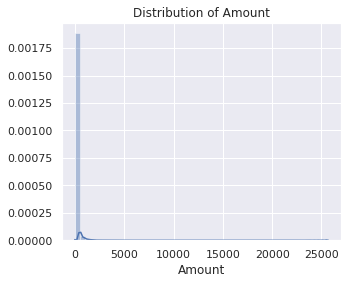

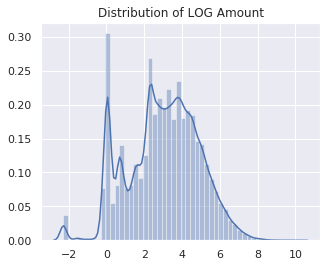

MAX 172792.0 0.09531017980432493
(190820, 2) (190820,)
MAX 1.032826289205918 2.3978952727983702
GLOBAL ACCURACY TRAIN SET (LIB) 1.0
GLOBAL ACCURACY TEST SET (LIB) 1.0

DETAILED REPORT TEST SET:

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     93840
       fraud       1.00      1.00      1.00       147

    accuracy                           1.00     93987
   macro avg       1.00      1.00      1.00     93987
weighted avg       1.00      1.00      1.00     93987



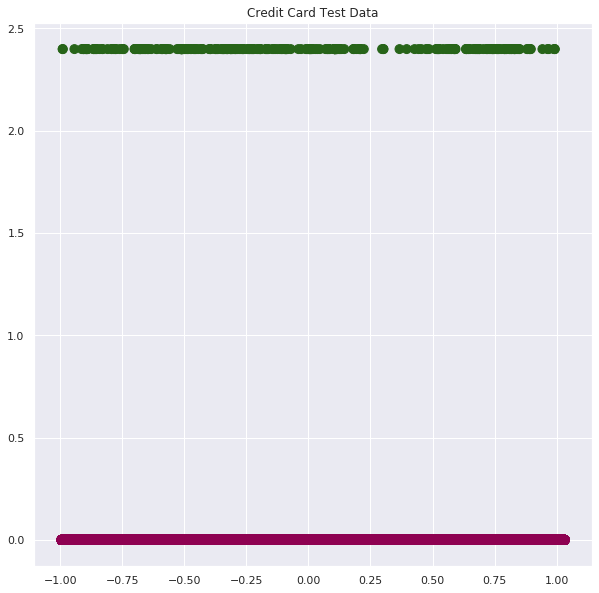

In [0]:
def show_proportions(X,y,title):
  final_df = pd.DataFrame(X)
  final_df["Class"] = y
  class_counts = final_df["Class"].value_counts()
  plt.figure(figsize=(6,3))
  sns.barplot(x=class_counts.index, y=class_counts)
  plt.title(title)
  plt.ylabel('Count')
  plt.xlabel('Class (0:Normal, 1:Fraud)')
  plt.show()

plt.figure(figsize=(5,4))
plt.title('Distribution of Amount')
sns.distplot(credit_data["Amount"])
plt.show()

plt.figure(figsize=(5,4))
plt.title('Distribution of LOG Amount')
sns.distplot(np.log(credit_data["Amount"].values + 0.1))
plt.show()

credit_data_aumm = pd.DataFrame(credit_data)
credit_data_aumm['log_Amount'] = np.log(credit_data['Class'].values + 0.1)

X = credit_data_aumm[['Time','log_Amount']].values 
y = credit_data_aumm['Class'].values
print("MAX",np.max(X[:,0]),np.max(X[:,1]))

rn = 20840

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rn)

print(X_train.shape,y_train.shape)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("MAX",np.max(X_train_scaled[:,0]),np.max(X_train_scaled[:,1]))


svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled,y_train)
print("GLOBAL ACCURACY TRAIN SET (LIB)",svm.score(X_train_scaled,y_train))
print("GLOBAL ACCURACY TEST SET (LIB)",svm.score(X_test_scaled,y_test))

print("\nDETAILED REPORT TEST SET:\n")
print(classification_report(y_test, svm.predict(X_test_scaled), target_names=["normal","fraud"]))

fig, ax = plt.subplots(figsize=(10,10))

#y=1 is fraud
ax.scatter(X_train_scaled[:,0],X_train_scaled[:,1],cmap=plt.get_cmap("PiYG"),s=80,c=y_train)

plt.title("Credit Card Test Data")
plt.show()

# Imports

In [0]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random

#conda install -c conda-forge imbalanced-learn
#conda install -c conda-forge python-wget


#syntax to handle multiple kernels with different parameters

#parameters = [
#  {'C': np.logspace(-3, 4, num=8, endpoint=True, base=10.0), 'kernel': ['linear']},
#  {'C': np.logspace(-3, 4, num=8, endpoint=True, base=10.0), 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


We will start by downloading and exploring the *Titanic* dataset, created for a famous competition at Kaggle. Using the wget command you can download the files from a GitHub repository.

In [0]:
!wget --no-check-certificate \
http://jricardon.github.io/titanic/train.csv -O \
   /tmp/titanic-train.csv

!wget --no-check-certificate \
http://jricardon.github.io/titanic/test.csv -O \
   /tmp/titanic-test.csv

URL transformed to HTTPS due to an HSTS policy
--2020-01-22 19:13:19--  https://jricardon.github.io/titanic/train.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘/tmp/titanic-train.csv’

/tmp/titanic-train. 100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2020-01-22 19:13:19 (4.34 MB/s) - ‘/tmp/titanic-train.csv’ saved [61194/61194]

URL transformed to HTTPS due to an HSTS policy
--2020-01-22 19:13:20--  https://jricardon.github.io/titanic/test.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/csv]
Saving to